

# INTRO to Machine Learning

* Arthur Samuel defines ML as "the field of study that gives computers the ability to learn without being explicitly     programmed." 

* Tom Mitchell defines ML as "[a] computer program is said to learn from experience E with respect to some class of     tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."

Example: playing checkers.
E = the experience of playing many games of checkers
T = the task of playing checkers.
P = the probability that the program will win the next game.


## Supervised Learning vs. Unsupervised Learning

> __Unsupervised Learning__:

You are given a dataset but do not have an idea of what the output will be. In some cases relationships are determined to "cluster" variables together. In other cases, unsupervised learning is used to seperate things in a chaotic enviroment. 

Clustering Example: Taking a list of NBA player data and stats and grouping players that do similar things together.
Non-Clustering Example: Take a recording of people speakig and isolating the individual voices.


> ___Supervised Learning___: 

You are given a data set and already know what our correct output should look like, getting a sense of the relationship between the output and input. Essential, you are given the "the right answers". 

There are two kinds of supervised learning problems **REGRESSION & CLASSIFICATION**. Regression is trying to determing the results in a continous output. Classification is outputing inputs into catergories. 

Regresssion Example: A relationship between the hours of study a student puts in and exam results.

Classification: Spam Detection, classification is used to group emails as spam or not 




## LINEAR REGRESSION

Linear regression using polyfit
parameters: a=0.80 b=-4.00 
regression: a=0.79 b=-4.07, ms error= 0.910


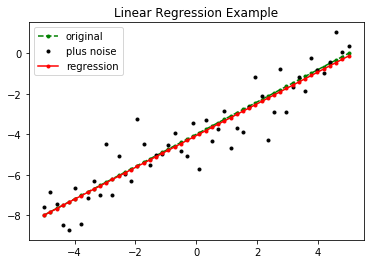

Linear regression using stats.linregress
parameters: a=0.80 b=-4.00 
regression: a=0.79 b=-4.07, std error= 0.045


In [2]:

from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend

#Linear regression example
# This is a very simple example of using two scipy tools 
# for linear regression, polyfit and stats.linregress

#Sample data creation
#number of points 
n=50
t=linspace(-5,5,n)
#parameters
a=0.8; b=-4
x=polyval([a,b],t)
#add some noise
xn=x+randn(n)

#Linear regressison -polyfit - polyfit can be used other orders polys
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f \nregression: a=%.2f b=%.2f, ms error= %.3f' % (a,b,ar,br,err))

#matplotlib ploting
title('Linear Regression Example')
plot(t,x,'g.--')
plot(t,xn,'k.')
plot(t,xr,'r.-')
legend(['original','plus noise', 'regression'])

show()

#Linear regression using stats.linregress
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
print('Linear regression using stats.linregress')
print('parameters: a=%.2f b=%.2f \nregression: a=%.2f b=%.2f, std error= %.3f' % (a,b,a_s,b_s,stderr))